# Setup

In [28]:
import requests
import os

from IPython.display import Image, display

## Setup wandb

In [21]:
!export WANDB_NOTEBOOK_NAME=wandb-homework

In [24]:
# Log in to your W&B account
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /Users/deltasmith/.netrc


True

# Q1. Install the Package
To get started with Weights & Biases you'll need to install the appropriate Python package.

For this we recommend creating a separate Python environment, for example, you can use conda environments, and then install the package there with pip or conda.

Following are the libraries you need to install:
```bash
pandas
matplotlib
scikit-learn
pyarrow
wandb
```
Once you installed the package, run the command `wandb --version` and check the output.

**What's the version that you have?**

In [ ]:
!pip install -r requirements.txt

In [4]:
!wandb --version

wandb, version 0.15.3


# Q2. Download and preprocess the data

We'll use the Green Taxi Trip Records dataset to predict the amount of tips for each trip.

Download the data for January, February and March 2022 in parquet format from [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

**Tip:** In case you're on [GitHub Codespaces](https://github.com/features/codespaces) or [gitpod.io](https://gitpod.io), you can open up the terminal and run the following commands to download the data:

```shell
wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet
wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet
wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet
```

Use the script `preprocess_data.py` located in the folder [`homework-wandb`](homework-wandb) to preprocess the data.

The script will:

* initialize a Weights & Biases run.
* load the data from the folder `<TAXI_DATA_FOLDER>` (the folder where you have downloaded the data),
* fit a `DictVectorizer` on the training set (January 2022 data),
* save the preprocessed datasets and the `DictVectorizer` to your Weights & Biases dashboard as an artifact of type `preprocessed_dataset`.

Your task is to download the datasets and then execute this command:

```bash
python preprocess_data.py \
  --wandb_project <WANDB_PROJECT_NAME> \
  --wandb_entity <WANDB_USERNAME> \
  --raw_data_path <TAXI_DATA_FOLDER> \
  --dest_path ./output
```

Tip: go to `02-experiment-tracking/homework-wandb/` folder before executing the command and change the value of `<WANDB_PROJECT_NAME>` to the name of your Weights & Biases project, `<WANDB_USERNAME>` to your Weights & Biases username, and `<TAXI_DATA_FOLDER>` to the location where you saved the data.



In [31]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/Users/deltasmith/.wget-hsts'. HSTS will be disabled.
--2023-06-06 14:03:23--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet
Resolviendo d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:200c:a00:b:20a5:b140:21, 2600:9000:200c:a600:b:20a5:b140:21, 2600:9000:200c:2600:b:20a5:b140:21, ...
Conectando con d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)[2600:9000:200c:a00:b:20a5:b140:21]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 1254291 (1.2M) [binary/octet-stream]
Grabando a: «green_tripdata_2022-01.parquet»

green_tripdata_2022 100%[===================>]   1.20M  4.41MB/s    en 0.3s    

2023-06-06 14:03:24 (4.41 MB/s) - «green_tripdata_2022-01.parquet» guardado [1254291/1254291]

Will not apply HSTS. The HSTS database must be a regular and non-world-writable

In [38]:
TAXI_DATA_FOLDER = "./"
WANDB_PROJECT_NAME = "wandb-homework"
WANDB_USERNAME = "carloslme"

In [39]:
!python preprocess_data.py \
  --wandb_project {WANDB_PROJECT_NAME} \
  --wandb_entity {WANDB_USERNAME} \
  --raw_data_path {TAXI_DATA_FOLDER} \
  --dest_path ./output

wandb: Currently logged in as: carloslme. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /Users/deltasmith/mlops-zoomcamp/02-experiment-tracking/wandb/wandb/run-20230606_141203-hhew05nw
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run deft-night-1
wandb: ⭐️ View project at https://wandb.ai/carloslme/wandb-homework
wandb: 🚀 View run at https://wandb.ai/carloslme/wandb-homework/runs/hhew05nw
wandb: Adding directory to artifact (./output)... Done. 0.0s


Once you navigate to the `Files` tab of your artifact on your Weights & Biases page, **what's the size of the saved `DictVectorizer` file?**

In [40]:
def get_file_size(file_path):
    size_in_bytes = os.path.getsize(file_path)
    return size_in_bytes / 1000

# Usage
file_path = './output/dv.pkl'
file_size_in_kb = get_file_size(file_path)
print(f"File size: {file_size_in_kb} KB")

File size: 153.66 KB


# Q3. Train a model with Weights & Biases logging
We will train a `RandomForestRegressor` (from Scikit-Learn) on the taxi dataset.

We have prepared the training script `train.py` for this exercise, which can be also found in the folder `homework-wandb`.

The script will:

initialize a Weights & Biases run.
load the preprocessed datasets by fetching them from the Weights & Biases artifact previously created,
train the model on the training set,
calculate the MSE score on the validation set and log it to Weights & Biases,
save the trained model and log it to Weights & Biases as a model artifact.
Your task is to modify the script to enable to add Weights & Biases logging, execute the script and then check the Weights & Biases run UI to check that the experiment run was properly tracked.

TODO 1: log `mse` to Weights & Biases under the key "`MSE`"

TODO 2: log `regressor.pkl` as an artifact of type `model`, refer to the official docs in order to know more about logging artifacts.

You can run the script using:

```bash
python train.py \
  --wandb_project <WANDB_PROJECT_NAME> \
  --wandb_entity <WANDB_USERNAME> \
  --data_artifact "<WANDB_USERNAME>/<WANDB_PROJECT_NAME>/NYC-Taxi:v0"
```

Tip 1: You can find the artifact address under the `Usage` tab in the respective artifact's page.

Tip 2: don't modify the hyperparameters of the model to make sure that the training will finish quickly.

Once you have successfully ran the script, navigate the `Overview` section of the run in the Weights & Biases UI and scroll down to the `Configs`. 

**What is the value of the `max_depth` parameter:**

In [42]:
!python train.py \
  --wandb_project {WANDB_PROJECT_NAME} \
  --wandb_entity {WANDB_USERNAME} \
  --data_artifact "{WANDB_USERNAME}/{WANDB_PROJECT_NAME}/NYC-Taxi:v0"

wandb: Currently logged in as: carloslme. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.15.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /Users/deltasmith/mlops-zoomcamp/02-experiment-tracking/wandb/wandb/run-20230607_112602-rtj02knq
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run cosmic-sunset-2
wandb: ⭐️ View project at https://wandb.ai/carloslme/wandb-homework
wandb: 🚀 View run at https://wandb.ai/carloslme/wandb-homework/runs/rtj02knq
wandb:   4 of 4 files downloaded.  


The `max_depth` value is:


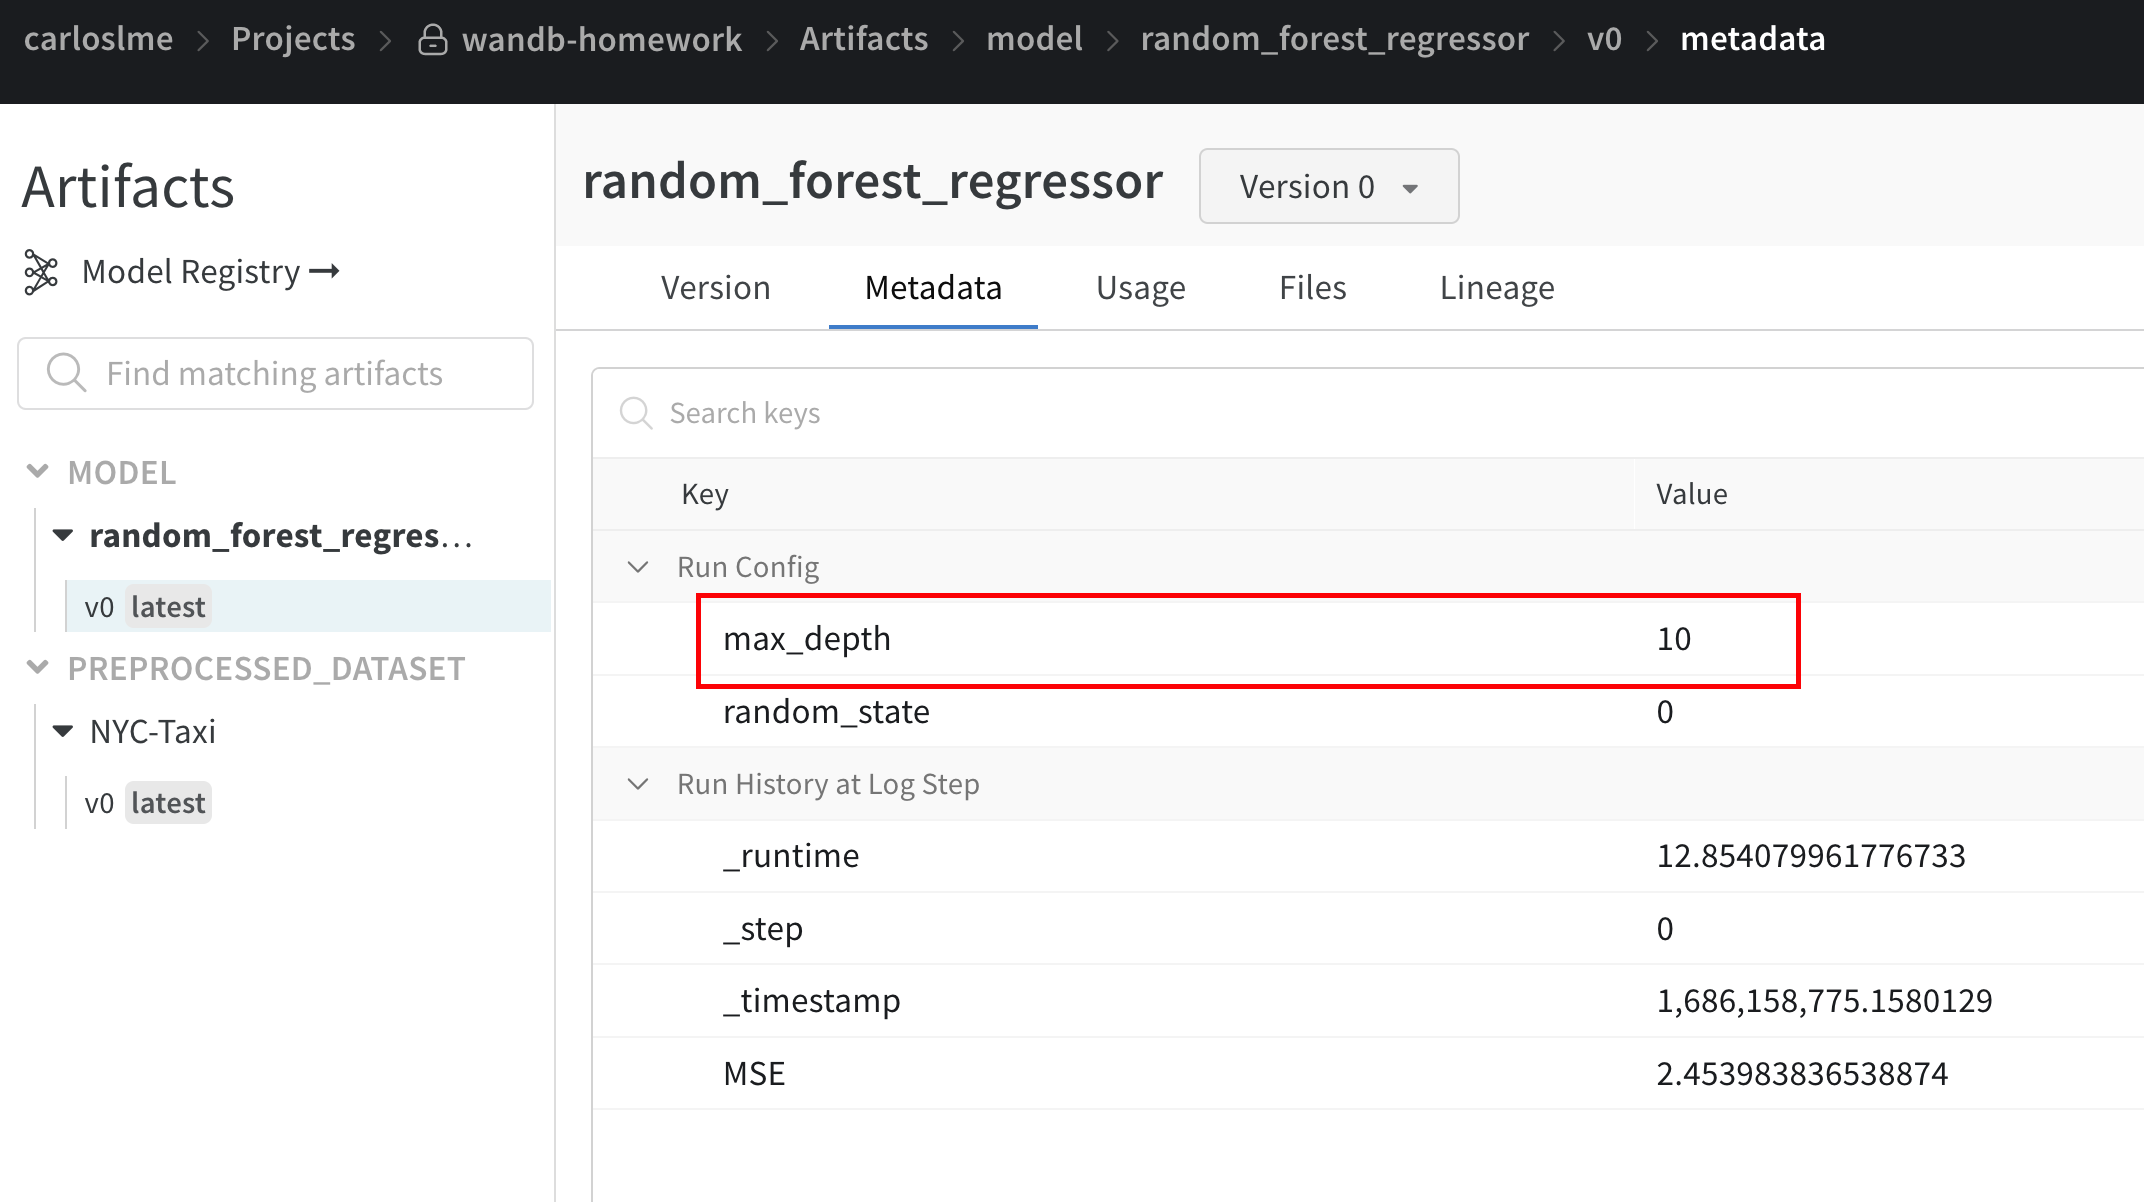

In [43]:
display(Image(filename='./wandb_max_depth.png'))

# Q4. Tune model hyperparameters

Now let's try to reduce the validation error by tuning the hyperparameters of the `RandomForestRegressor` using [Weights & Biases Sweeps](https://docs.wandb.ai/guides/sweeps). We have prepared the script `sweep.py` for this exercise in the `homework-wandb` directory.

Your task is to modify `sweep.py` to pass the parameters `n_estimators`, `min_samples_split` and `min_samples_leaf` from `config` to `RandomForestRegressor` inside the `run_train()` function. Then we will run the sweep to figure out not only the best best of hyperparameters for training our model, but also to analyze the most optimum trends in different hyperparameters. We can run the sweep using:

```bash
python sweep.py \
  --wandb_project <WANDB_PROJECT_NAME> \
  --wandb_entity <WANDB_USERNAME> \
  --data_artifact "<WANDB_USERNAME>/<WANDB_PROJECT_NAME>/NYC-Taxi:v0"
```

This command will run the sweep for 5 iterations using the **Bayesian Optimization and HyperBand** method proposed by the paper [BOHB: Robust and Efficient Hyperparameter Optimization at Scale](https://arxiv.org/abs/1807.01774). You can take a look at the sweep on your Weights & Biases dashboard, take a look at the **Parameter Importance Panel** and the **Parallel Coordinates Plot** to determine, and analyze which hyperparameter is the most important:

In [44]:
!python sweep.py \
  --wandb_project {WANDB_PROJECT_NAME} \
  --wandb_entity {WANDB_USERNAME} \
  --data_artifact "{WANDB_USERNAME}/{WANDB_PROJECT_NAME}/NYC-Taxi:v0"

Create sweep with ID: ply04pag
Sweep URL: https://wandb.ai/carloslme/wandb-homework/sweeps/ply04pag
wandb: Agent Starting Run: x0ky9nfv with config:
wandb: 	max_depth: 15
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 17


wandb: Waiting for W&B process to finish... (success).
wandb: Waiting for W&B process to finish... (success).
wandb: Waiting for W&B process to finish... (success).
wandb: Waiting for W&B process to finish... (success).
wandb: Waiting for W&B process to finish... (success).
wandb: ERROR Error while calling W&B API: failed to find run wandb-homework/m5vk61mh (<Response [404]>)


wandb: Currently logged in as: carloslme. Use `wandb login --relogin` to force relogin


wandb: ERROR Error while calling W&B API: failed to find run wandb-homework/2rt69lzz (<Response [404]>)
wandb: ERROR Error while calling W&B API: failed to find run wandb-homework/z4uie91k (<Response [404]>)
wandb: 🚀 View run worldly-cosmos-1 at: https://wandb.ai/carloslme/mlops-zoomcamp-02-experiment-tracking_wandb/runs/2rt69lzz
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20230606_135710-2rt69lzz/logs


wandb: wandb version 0.15.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /Users/deltasmith/mlops-zoomcamp/02-experiment-tracking/wandb/wandb/run-20230607_122137-x0ky9nfv
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run skilled-sweep-1
wandb: ⭐️ View project at https://wandb.ai/carloslme/wandb-homework
wandb: 🧹 View sweep at https://wandb.ai/carloslme/wandb-homework/sweeps/ply04pag
wandb: 🚀 View run at https://wandb.ai/carloslme/wandb-homework/runs/x0ky9nfv


wandb: 🚀 View run feasible-meadow-2 at: https://wandb.ai/carloslme/mlops-zoomcamp-02-experiment-tracking_wandb/runs/m5vk61mh
wandb: Synced 6 W&B file(s), 0 media file(s), 4 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20230606_140000-m5vk61mh/logs


wandb:   4 of 4 files downloaded.  


wandb: 🚀 View run prime-sea-1 at: https://wandb.ai/carloslme/wwandb-homework/runs/z4uie91k
wandb: Synced 6 W&B file(s), 0 media file(s), 4 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20230606_140819-z4uie91k/logs
wandb: 🚀 View run deft-night-1 at: https://wandb.ai/carloslme/wandb-homework/runs/hhew05nw
wandb: Synced 6 W&B file(s), 0 media file(s), 6 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20230606_141203-hhew05nw/logs
wandb: 
wandb: Run history:
wandb: MSE ▁
wandb: 
wandb: Run summary:
wandb: MSE 2.45398
wandb: 
wandb: 🚀 View run cosmic-sunset-2 at: https://wandb.ai/carloslme/wandb-homework/runs/rtj02knq
wandb: Synced 6 W&B file(s), 0 media file(s), 3 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20230607_112602-rtj02knq/logs


wandb: Waiting for W&B process to finish... (success).
wandb: | 0.974 MB of 0.974 MB uploaded (0.000 MB deduped)
wandb: Run history:
wandb: MSE ▁
wandb: 
wandb: Run summary:
wandb: MSE 2.45004
wandb: 
wandb: 🚀 View run skilled-sweep-1 at: https://wandb.ai/carloslme/wandb-homework/runs/x0ky9nfv
wandb: Synced 6 W&B file(s), 0 media file(s), 1 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20230607_122137-x0ky9nfv/logs
wandb: Agent Starting Run: gpphct01 with config:
wandb: 	max_depth: 3
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 7
wandb: 	n_estimators: 35
wandb: wandb version 0.15.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /Users/deltasmith/mlops-zoomcamp/02-experiment-tracking/wandb/wandb/run-20230607_122154-gpphct01
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run woven-sweep-2
wandb: ⭐️ View project at https://wandb.

The `n_estimators` is the most important hyperparameter, as shown belown:

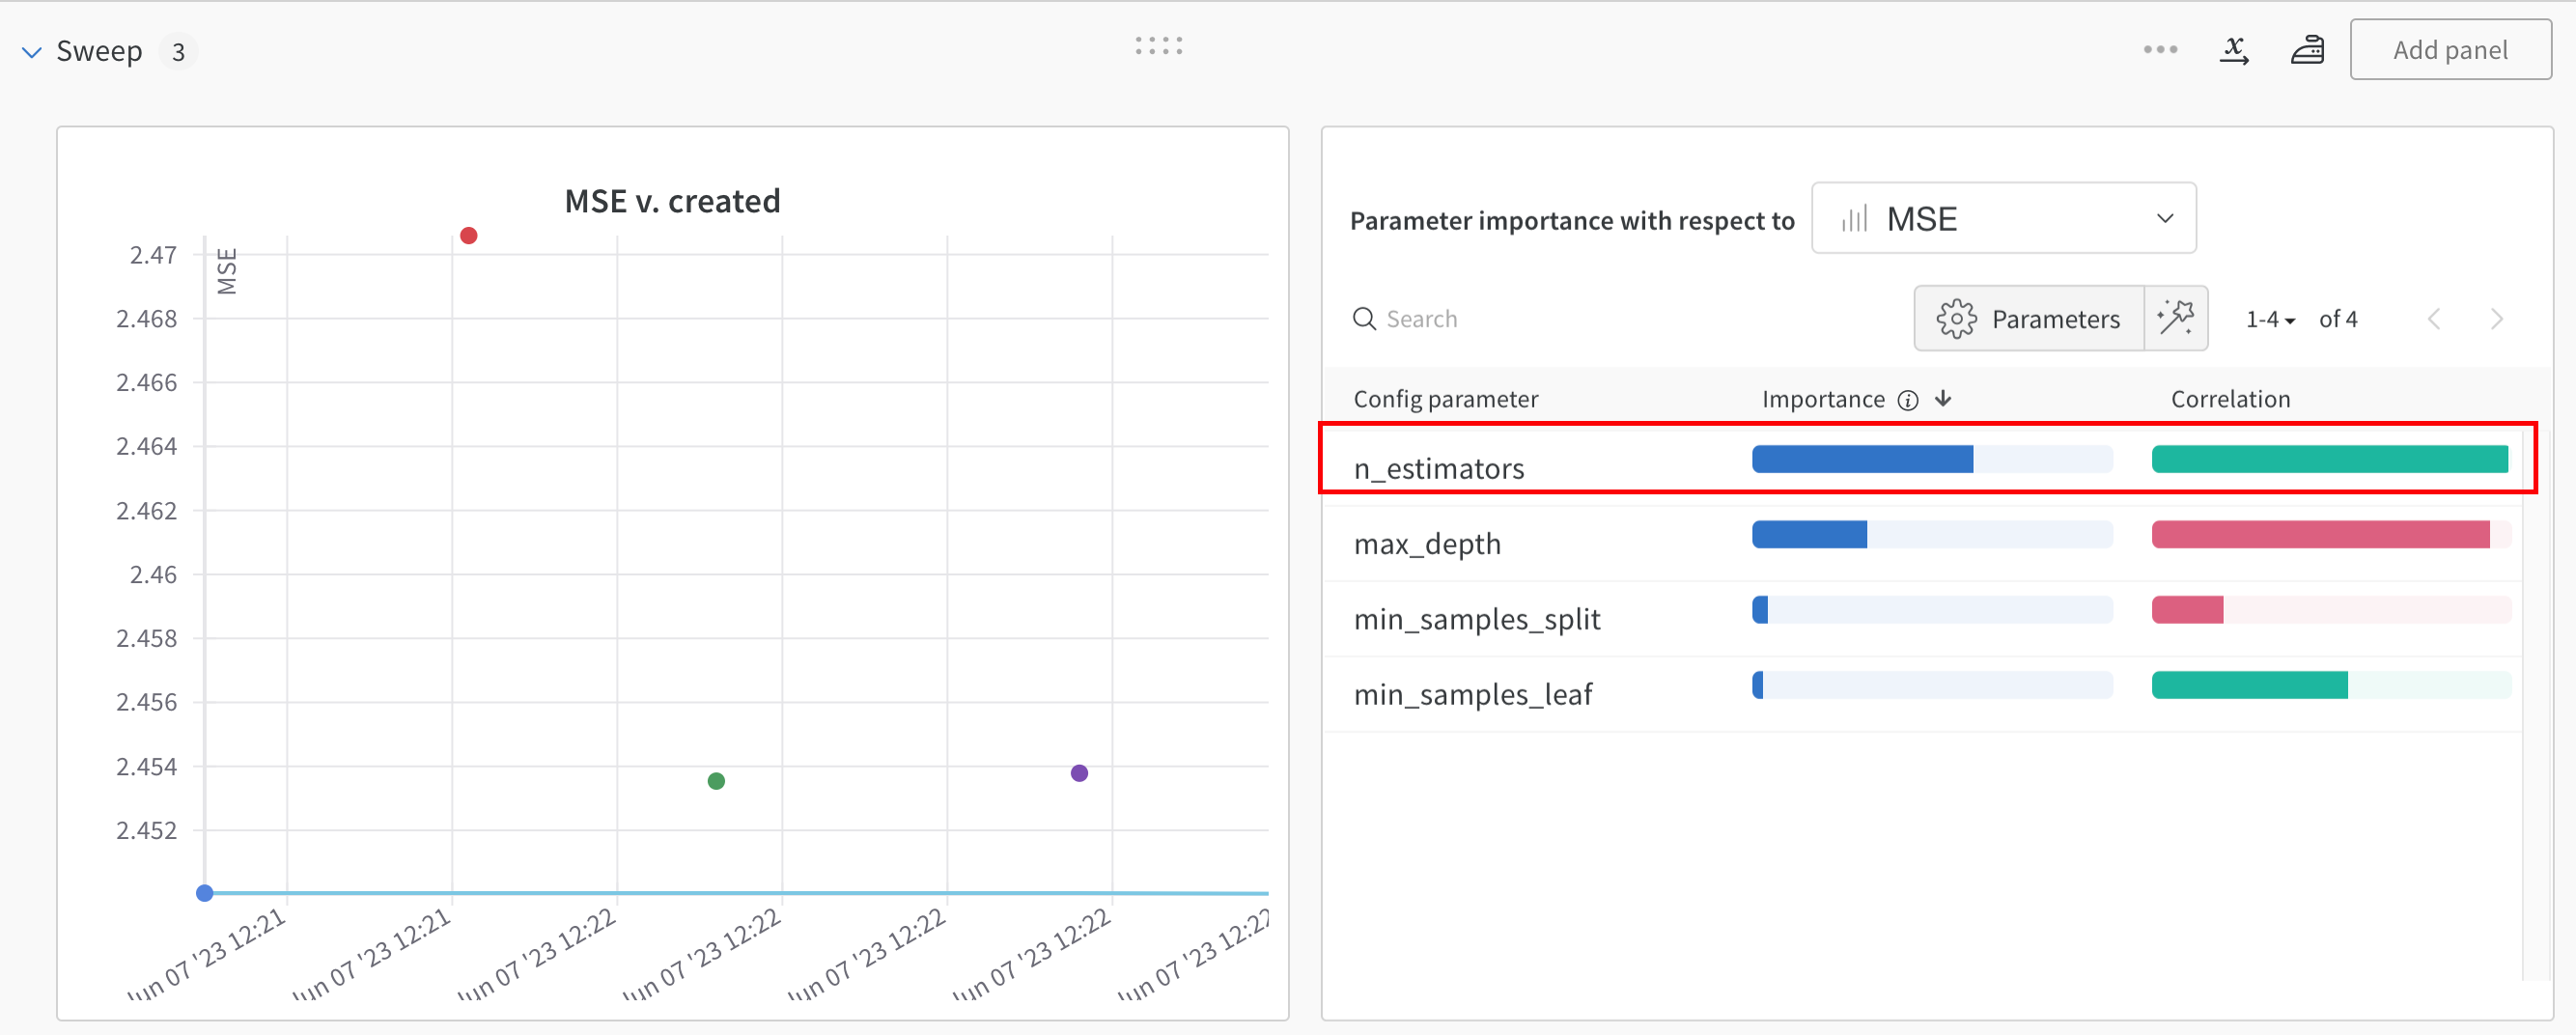

In [45]:
display(Image(filename='./importance_parameter.png'))